In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functions import (
    preprocess, train_default_catboost,
    cross_validation, plot_cv_learning_curve,
    gridsearch
)

In [3]:
df_train, df_test = preprocess('./data/train.csv'), preprocess('./data/test.csv')

In [4]:
df_train.head()

,Код_группы,Год_Поступления,Основания,КодФакультета,СрБаллАттестата,Статус,Код1,Код2,Код3,Муж,Год_Рождения,Возраст_Поступления,Перерыв,ПолнаяСемья,Учеба,МестоЖит
ID,,,,,,,,,,,,,,,,
72716,16019,2015,оо,41,85.88,3,16,01,019,0,1998,17,1,False,ш,брн
63306,14895,2010,цн,28,67.00,4,14,89,895,1,1992,18,0,True,н,брн
82469,20103,2017,дн,41,82.66,4,20,10,103,0,1999,18,0,True,ш,алт
81661,19838,2017,бн,35,74.00,4,19,83,838,0,1994,23,0,True,у,брн
81509,19803,2017,бн,28,53.00,4,19,80,803,0,1995,22,0,True,у,брн


In [5]:
df_train.dtypes

Код_группы             category
Год_Поступления           int64
Основания              category
КодФакультета          category
СрБаллАттестата         float64
Статус                    int64
Код1                   category
Код2                   category
Код3                   category
Муж                       int64
Год_Рождения              int64
Возраст_Поступления       int64
Перерыв                   int64
ПолнаяСемья                bool
Учеба                  category
МестоЖит               category
dtype: object

In [6]:
X, y = df_train.drop(['Статус'], axis=1, errors='ignore'), df_train['Статус'].replace({-1: 0, 3: 1, 4: 2})
X_test = df_test.drop(['Статус'], axis=1, errors='ignore')

# X.drop(['Код_группы'], axis=1, inplace=True)

In [7]:
params = {
    'iterations': [1000],
    'loss_function': ['MultiClass'],
    'eval_metric': ['TotalF1:average=Macro;use_weights=false'],
    'learning_rate': [0.03],
    # 'depth': [4, 5],
    'class_weights': [[1.8,1,1]],
}
# gridsearch(X, y, params)

In [8]:
fold_count = 3
params = {
    'iterations': 1000,
    'loss_function': 'MultiClass',
    'eval_metric': 'TotalF1:average=Macro;use_weights=False',
    # 'custom_metric': 'F1',
    'learning_rate': 0.03,
    'class_weights': [1.8,1,1],
}
cv_data = cross_validation(X, y, params, fold_count=fold_count)

Training on fold [0/3]

bestTest = 0.8007209059
bestIteration = 980

Training on fold [1/3]

bestTest = 0.8091046551
bestIteration = 840

Training on fold [2/3]

bestTest = 0.7993653911
bestIteration = 996



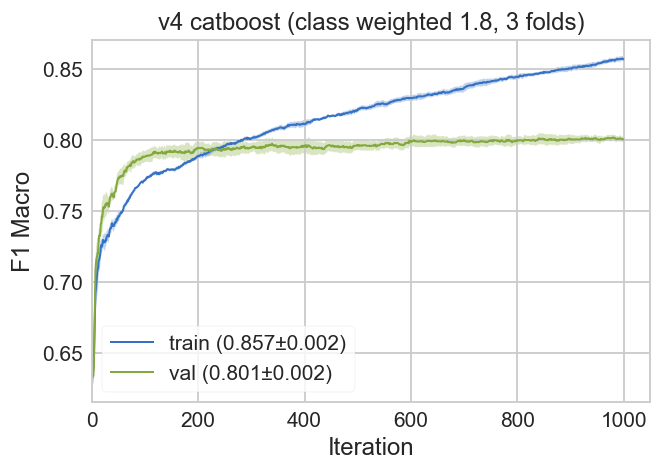

In [9]:
title = 'v4 catboost (class weighted 1.8, 3 folds)'
plot_cv_learning_curve(cv_data, 'TotalF1:average=Macro;use_weights=false', fold_count, title)
# plt.savefig(f'./results/images/{"_".join(title.split())}.png')

In [ ]:
params = {
    'iterations': 1000,
    'loss_function': 'MultiClass',
    'learning_rate': 0.03,
    'class_weights': [1.8, 1, 1],
}
clf = train_default_catboost(X, y, X_test, params, savepath='results/catboost_default.csv')

Train len: 10867, val len: 2717, test len: 6691
{'nan_mode': 'Min', 'eval_metric': 'MultiClass', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'], 'iterations': 1000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'ctr_leaf_count_limit': 18446744073709551615, 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'max_ctr_complexity': 4, 'model_size_reg': 0.5, 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderTyp